# **Sentiment Analysis Restaurant Reviews**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Importing Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/IBM/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [4]:
data.shape

(1000, 2)

In [5]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

# **Data Cleaning**

In [8]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]',' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [10]:
corpus[:1500]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# **Bag of Words Model**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(max_features=1500)
# X = tfidf.fit_transform(corpus).toarray()
# y = data.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# **1. Multinomial Naive Bayes**

In [14]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("Accuracy Score is: {}%".format(round(score1*100,2)))
print("Precision Score is: {}%".format(round(score2*100,2)))
print("Recall Score is: {}%".format(round(score3*100,2)))

Accuracy Score is: 77.5%
Precision Score is: 77.88%
Recall Score is: 78.64%


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[74, 23],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual Values')

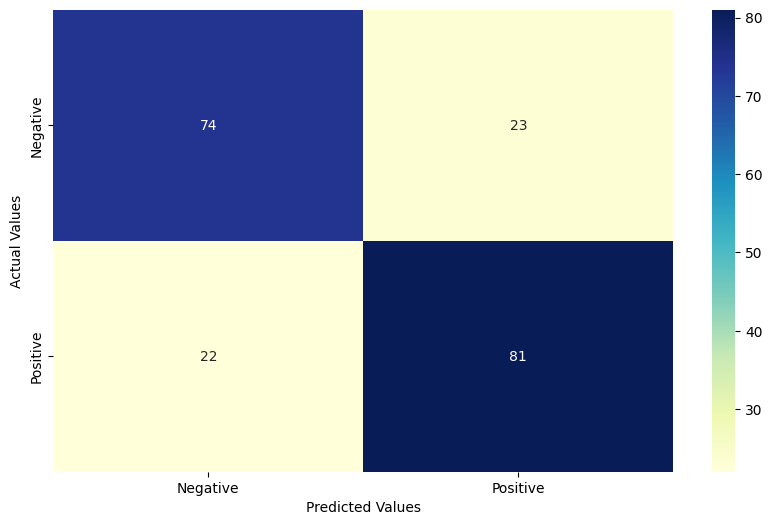

In [23]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [24]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1, 1.1, 0.1):
  temp_classifier = MultinomialNB(alpha = i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy Score for alpha = {} is: {}%".format(round(i,1), round(score * 100, 2)))
  if score > best_accuracy:
    best_accuracy = score
    alpha_val = i
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy * 100, 2), round(alpha_val, 1)))

Accuracy Score for alpha = 0.1 is: 78.5%
Accuracy Score for alpha = 0.2 is: 79.0%
Accuracy Score for alpha = 0.3 is: 78.5%
Accuracy Score for alpha = 0.4 is: 78.5%
Accuracy Score for alpha = 0.5 is: 78.0%
Accuracy Score for alpha = 0.6 is: 78.0%
Accuracy Score for alpha = 0.7 is: 78.5%
Accuracy Score for alpha = 0.8 is: 78.0%
Accuracy Score for alpha = 0.9 is: 78.0%
Accuracy Score for alpha = 1.0 is: 77.5%
The best accuracy is 79.0% with alpha value as 0.2


In [25]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [26]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl='', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  # temp = tfidf.transform([final_review]).toarray()
  return classifier.predict(temp)

In [27]:
sample_review = 'The food was bad!'

if predict_sentiment(sample_review):
  print('This is a positive review.')
else:
  print('This is a negative review.')

This is a negative review.


In [28]:
sample_review = 'The food was absolutely wonderful and service was good.'

if predict_sentiment(sample_review):
  print('This is a positive review.')
else:
  print('This is a negative review.')

This is a positive review.


# **2. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 12)

rf = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth = 30,
                       max_features = 'log2', min_samples_leaf = 2,
                       n_estimators = 500, random_state = 0)
rf.fit(X_train, y_train)
cv = cross_val_score(rf, X_train, y_train, cv = kfold)
print(cv)
print(cv.mean() * 100)
y_pred_rf = rf.predict(X_test)

[0.79104478 0.80597015 0.76119403 0.80597015 0.7761194  0.80597015
 0.7761194  0.76119403 0.8030303  0.75757576 0.90909091 0.83333333]
79.8884366048545


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_pred_rf, y_test)
score2 = precision_score(y_pred_rf, y_test)
score3 = recall_score(y_pred_rf, y_test)

print("Accuracy Score is: {}%".format(round(score1 * 100, 2)))
print("Precision Score is: {}%".format(round(score2 * 100, 2)))
print("Recall Score is: {}%".format(round(score3 * 100, 2)))

Accuracy Score is: 80.0%
Precision Score is: 69.9%
Recall Score is: 88.89%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[88,  9],
       [31, 72]])

Text(95.72222222222221, 0.5, 'Actual Values')

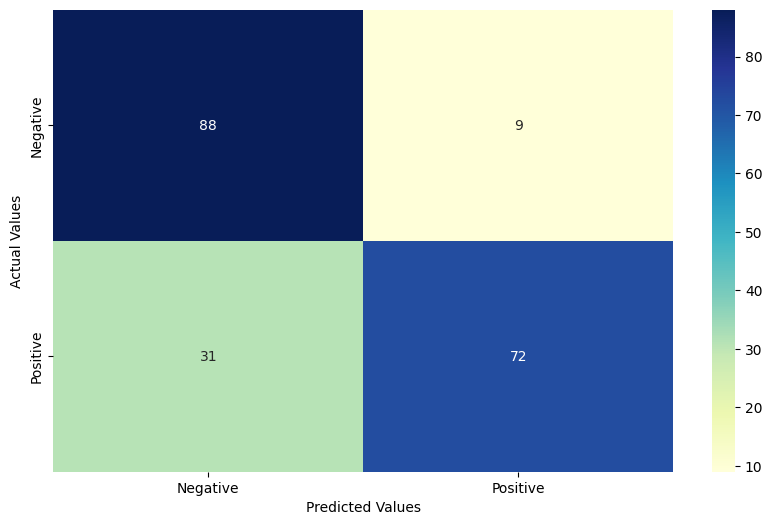

In [ ]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, cmap = "YlGnBu", xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# **3. Linear SVM**

In [ ]:
from sklearn.svm import SVC
svcl = SVC(kernel = 'linear', random_state = 0, probability = True)
svcl.fit(X_train, y_train)
cv = cross_val_score(svcl, X_train, y_train, cv = kfold)
print(cv)
print(cv.mean() * 100)
y_pred_svcl = svcl.predict(X_test)

[0.7761194  0.82089552 0.74626866 0.79104478 0.7761194  0.76119403
 0.82089552 0.88059701 0.75757576 0.72727273 0.83333333 0.74242424]
78.61450324136891


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_pred_svcl, y_test)
score2 = precision_score(y_pred_svcl, y_test)
score3 = recall_score(y_pred_svcl, y_test)

print("Accuracy Score is: {}%".format(round(score1 * 100, 2)))
print("Precision Score is: {}%".format(round(score2 * 100, 2)))
print("Recall Score is: {}%".format(round(score3 * 100, 2)))

Accuracy Score is: 79.0%
Precision Score is: 76.7%
Recall Score is: 81.44%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svcl)
cm

array([[79, 18],
       [24, 79]])

Text(95.72222222222221, 0.5, 'Actual Values')

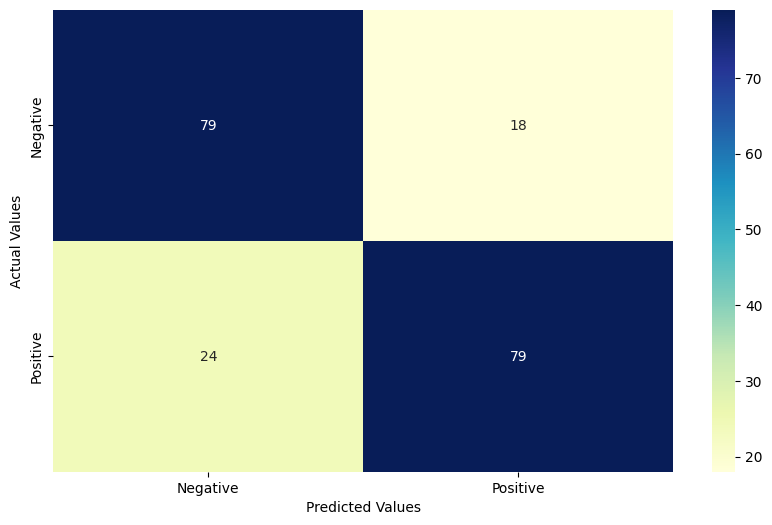

In [ ]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, cmap = "YlGnBu", xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# **4. XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 12)

xgb_classifier = xgb.XGBClassifier(
    max_depth = 6,
    n_estimators = 500,
    learning_rate = 0.1,
    random_state = 0,
)

xgb_classifier.fit(X_train, y_train)

cv = cross_val_score(xgb_classifier, X_train, y_train, cv = kfold)
print(cv)
print(cv.mean() * 100)

y_pred_xgb = xgb_classifier.predict(X_test)

[0.68656716 0.82089552 0.64179104 0.7761194  0.71641791 0.70149254
 0.79104478 0.73134328 0.81818182 0.78787879 0.84848485 0.78787879]
75.90079903512739


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_pred_xgb, y_test)
score2 = precision_score(y_pred_xgb, y_test)
score3 = recall_score(y_pred_xgb, y_test)

print("Accuracy Score is: {}%".format(round(score1 * 100, 2)))
print("Precision Score is: {}%".format(round(score2 * 100, 2)))
print("Recall Score is: {}%".format(round(score3 * 100, 2)))

Accuracy Score is: 71.0%
Precision Score is: 61.17%
Recall Score is: 77.78%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm

array([[79, 18],
       [40, 63]])

Text(95.72222222222221, 0.5, 'Actual Values')

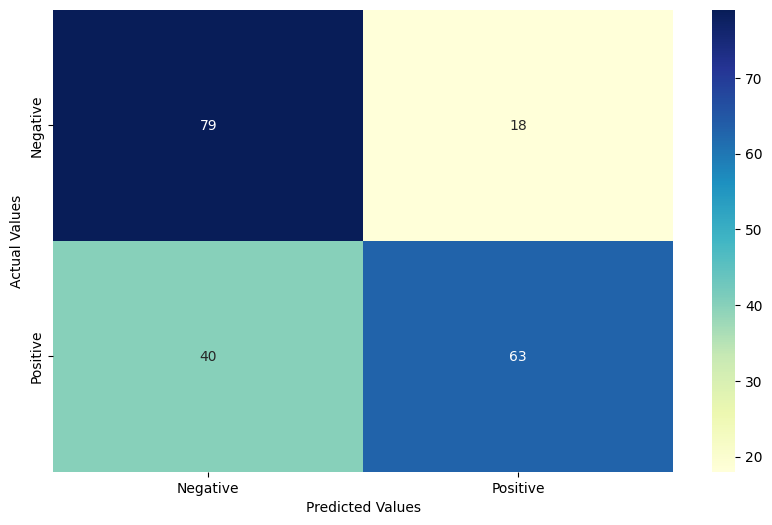

In [ ]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, cmap = "YlGnBu", xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')